In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Area to the left of quantile 0.025 is 0.02500 (+-4.329e-09)
Area to the left of quantile 0.160 is 0.16000 (+-3.29e-12)
Area to the left of quantile 0.500 is 0.50000 (+-6.293e-09)
Area to the left of quantile 0.840 is 0.84000 (+-2.3931e-09)
Area to the left of quantile 0.975 is 0.97500 (+-7.7655e-09)


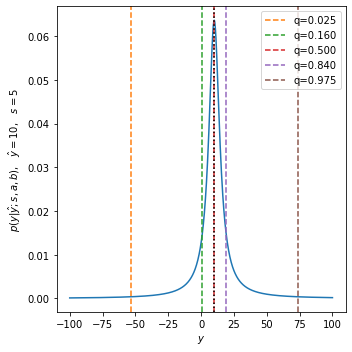

In [2]:
from scipy.stats import cauchy

def p(y,y_mode, y_scale):
    return cauchy(loc=y_mode, scale=y_scale).pdf(y)

def y_quantile(q, y_hat, s):
    return cauchy(loc=y_mode, scale=y_scale).ppf(q)

# Set y coords
y_scale=5
y_mode=10
y_lb = -100
y_ub = +100
ys = np.linspace(y_lb, y_ub, 1000)

# Plot distributions
fig, ax = plt.subplots(figsize=[5,5])

dist = lambda y: p(y,y_mode=y_mode, y_scale=y_scale)
ax.plot(ys, dist(ys))

for i, q in enumerate([.025,.16,.50,.84,.975]):

    # Compute quantiles
    y_q = y_quantile(q, y_mode, y_scale)
    color = f'C{i+1:d}'
    ax.axvline(y_q, linestyle='--', label=f'q={q:.3f}', color=color)
    
    # Check normalization
    res, err = quad(dist, -np.inf, y_q)
    print(f"Area to the left of quantile {q:.3f} is {res:.5f} (+-{err:.5g})")
    
# Show median
ax.axvline(y_mode, color='k', linestyle=':')
ax.legend()
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y|\hat{y};s,a,b)$,   $\hat{y}=%d$,   $s=%d$'%(y_mode, y_scale))
fig.tight_layout()

fig.savefig('cauchy.png')